In [1]:
import pandas as pd

In [15]:
# Load the dataset
swiggy_data = pd.read_csv('Manuvardhan 2237658/swiggyOriginal.csv', encoding='ISO-8859-1')


In [17]:
# Step 1: Ensure 'Avg ratings' is within the valid range (1 to 5)
# Remove rows where 'Avg ratings' is outside the range to maintain data accuracy
swiggy_data = swiggy_data[(swiggy_data['Avg ratings'] >= 1.0) & (swiggy_data['Avg ratings'] <= 5.0)]


In [21]:
# Step 2: Standardize 'City' and 'Area' columns with unique three-letter codes
# Create a mapping dictionary for unique three-letter codes for each city and area
city_mapping = {city: city[:3].upper() for city in swiggy_data['City'].unique()}
area_mapping = {area: area[:3].upper() for area in swiggy_data['Area'].unique()}




In [23]:
# Apply these mappings to create 'City Code' and 'Area Code' columns in the dataset
swiggy_data['City Code'] = swiggy_data['City'].map(city_mapping)
swiggy_data['Area Code'] = swiggy_data['Area'].map(area_mapping)


In [27]:
#Step 3: Parse and expand 'Food type' column
# Split the 'Food type' column by commas to separate multiple cuisines into individual rows
swiggy_data['Food type'] = swiggy_data['Food type'].str.split(',')
# Use explode to create a new row for each cuisine type in 'Food type'
swiggy_data = swiggy_data.explode('Food type').reset_index(drop=True)



In [29]:
# Step 4: Remove outliers in 'Delivery time' using the IQR method
# Calculate the IQR for 'Delivery time'
Q1 = swiggy_data['Delivery time'].quantile(0.25)
Q3 = swiggy_data['Delivery time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [31]:
# Filter the data to include only rows where 'Delivery time' is within the acceptable range
swiggy_data = swiggy_data[(swiggy_data['Delivery time'] >= lower_bound) & (swiggy_data['Delivery time'] <= upper_bound)]


In [33]:
# Save the cleaned dataset to a new CSV file
swiggy_data.to_csv('Manuvardhan 2237658/swiggyCleaned.csv', index=False)

print("The cleaned dataset, with outliers removed, has been saved as 'swiggy_cleaned.csv' in the Downloads folder.")

The cleaned dataset, with outliers removed, has been saved as 'swiggy_cleaned.csv' in the Downloads folder.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
# Load the cleaned dataset
swiggy_data = pd.read_csv('Manuvardhan 2237658/swiggyCleaned.csv')



In [39]:
# Function 1: Histogram of Price Distribution
def plot_price_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Price'], bins=30, kde=True)
    plt.title('Distribution of Prices', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    


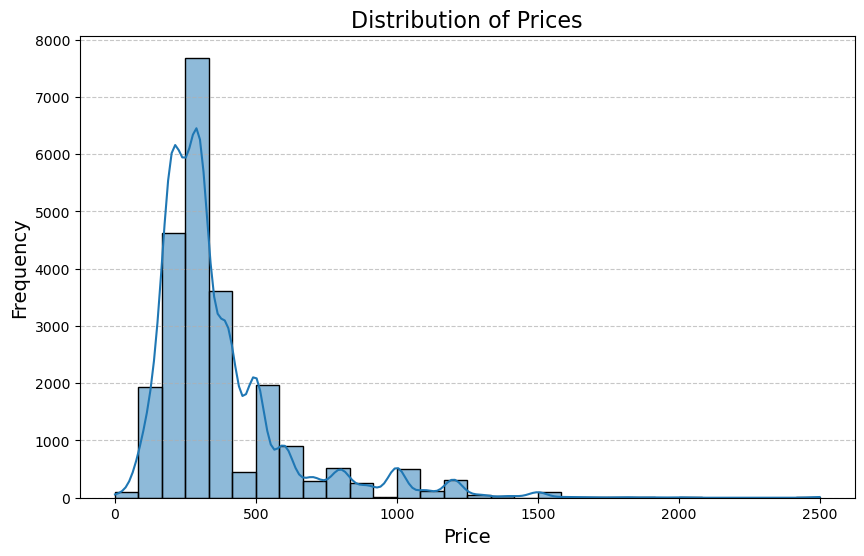

In [41]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_price_distribution(swiggy_data)


In [43]:
#Function 2: Bar Chart of Average Ratings by City
def plot_avg_rating_by_city(data):
    avg_rating_city = data.groupby('City Code')['Avg ratings'].mean().sort_values()
    plt.figure(figsize=(12, 8))
    avg_rating_city.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Ratings by City', fontsize=16)
    plt.xlabel('City', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

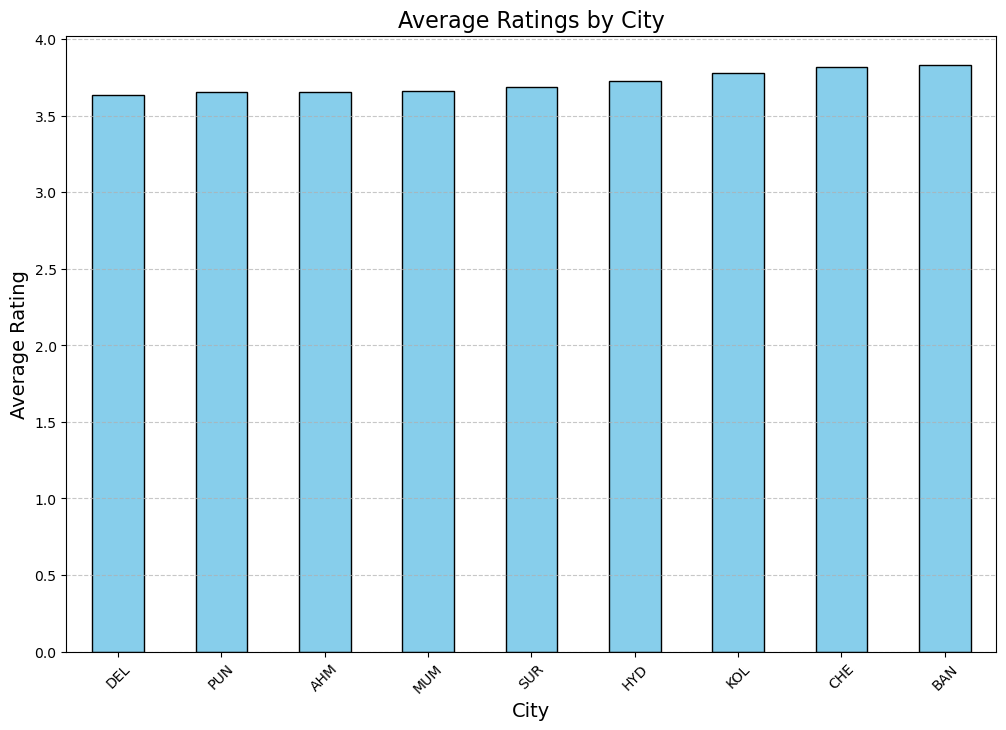

In [45]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_avg_rating_by_city(swiggy_data)


In [47]:
# Function 3: Pie Chart of Food Type Distribution
def plot_food_type_distribution(data):
    food_counts = data['Food type'].value_counts().head(10)
    plt.figure(figsize=(8, 8))
    plt.pie(food_counts, labels=food_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    plt.title('Top 10 Food Types', fontsize=16)


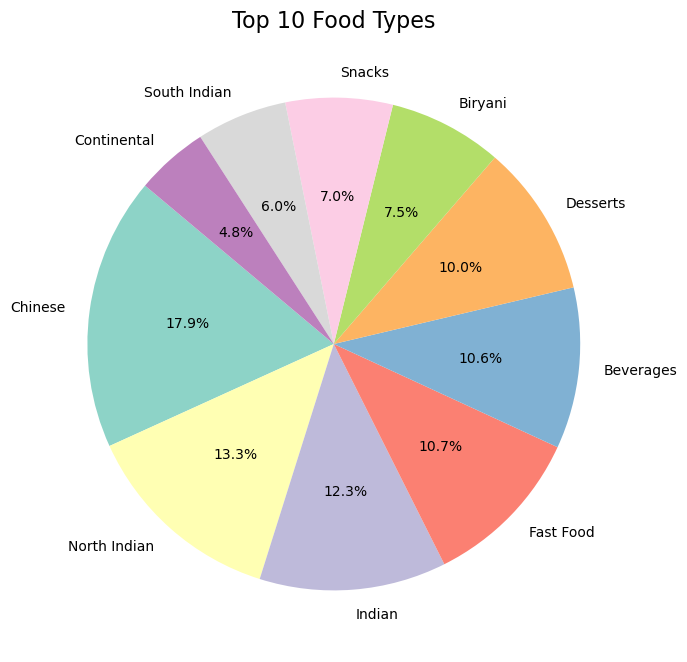

In [49]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_food_type_distribution(swiggy_data)


In [51]:
# Function 4: Scatter Plot of Price vs Average Rating
def plot_price_vs_rating(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Price', y='Avg ratings', data=data, hue='City Code', palette='viridis', alpha=0.7)
    plt.title('Price vs Average Rating', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)


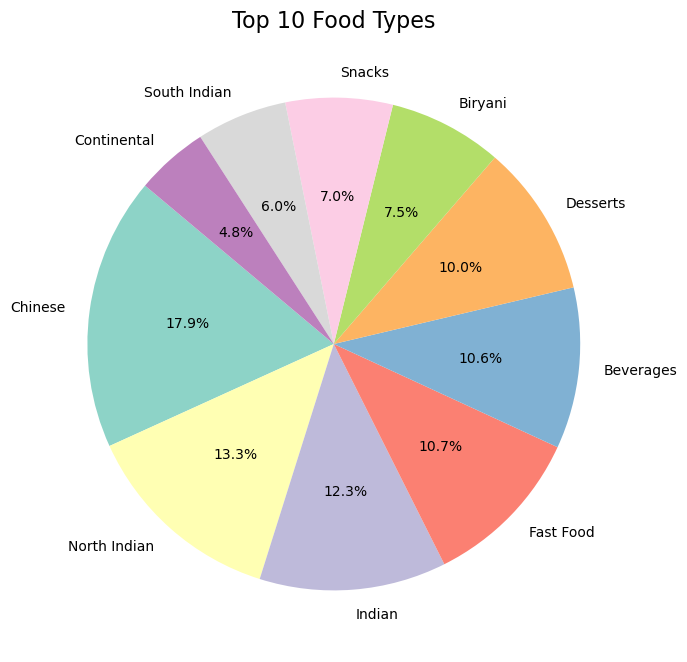

In [53]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_food_type_distribution(swiggy_data)



In [55]:
# Function 5: Heatmap of Correlations
def plot_correlation_heatmap(data):
    plt.figure(figsize=(8, 6))
    correlation = data[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16)


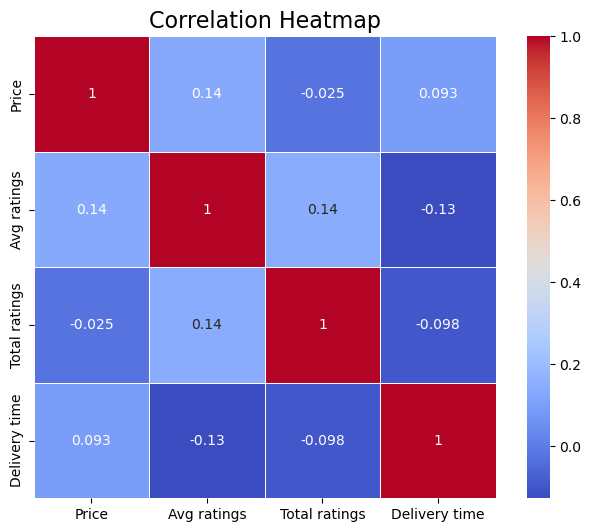

In [57]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_correlation_heatmap(swiggy_data)

In [59]:
# Function 6: Box Plot of Price by Food Type
def plot_price_by_food_type(data):
    top_food_types = data['Food type'].value_counts().nlargest(10).index
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Food type', y='Price', data=data[data['Food type'].isin(top_food_types)], hue='Food type', dodge=False, palette='pastel')
    plt.title('Price Distribution by Food Type (Top 10)', fontsize=16)
    plt.xlabel('Food Type', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

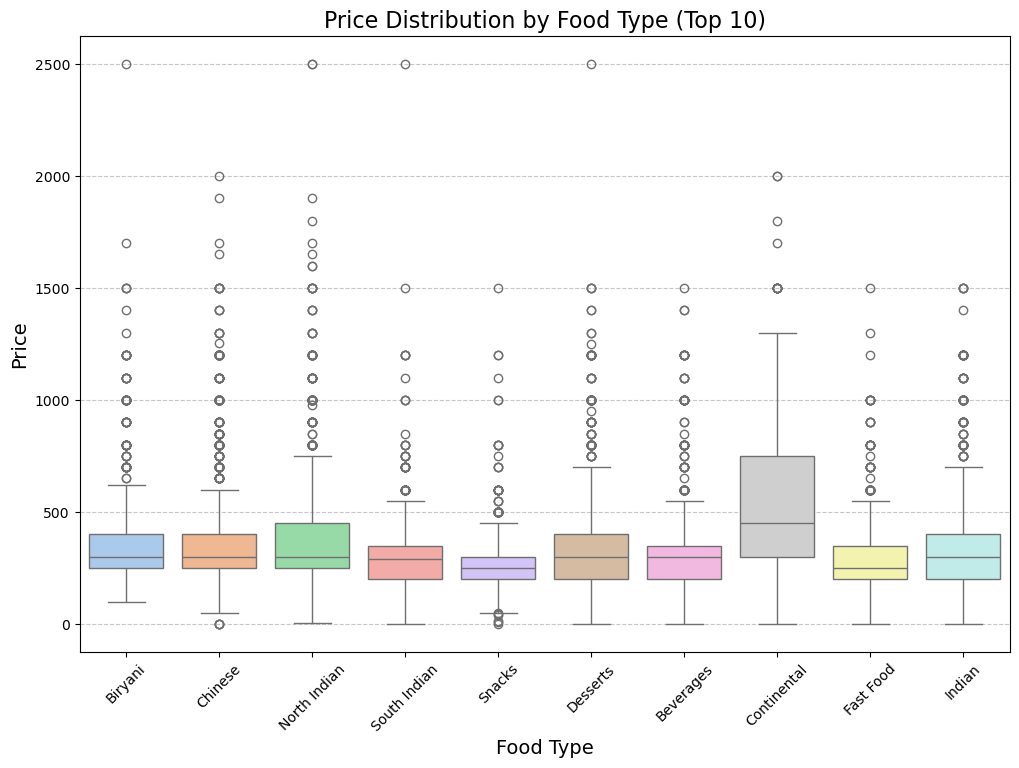

In [61]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_price_by_food_type(swiggy_data)


In [63]:
# Function 7: Scatter Plot of Delivery Time vs Average Rating
def plot_delivery_time_vs_rating(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Delivery time', y='Avg ratings', data=data, hue='City Code', palette='cool', alpha=0.7)
    plt.title('Delivery Time vs Average Rating', fontsize=16)
    plt.xlabel('Delivery Time (minutes)', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

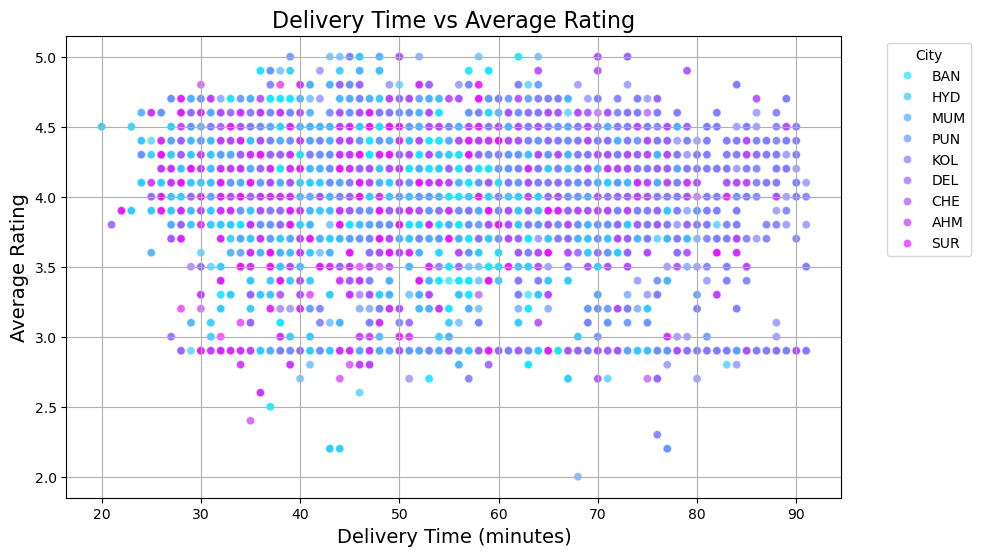

In [65]:
    plt.savefig('Manuvardhan 2237658/price_distribution.png')
    plt.close()
plot_delivery_time_vs_rating(swiggy_data)